In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

170500096/170498071 [==============================] - 404s 2us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
labels = ["airplane", "automobile", "bird",
          "cat", "deer", "dog", "frog",
          "horse", "ship", "truck"]

2


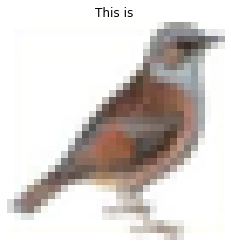

In [9]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.title("This is ")
print(y_train[c][0])
plt.axis("off")
plt.imshow(x_train[c])


In [10]:
#圖片處理
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [11]:
#答案處理: Out-Hot
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("before:", y_train[0])
print("after:", y_train_cat[0])

before: [6]
after: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn = Sequential()
#3 * 3 * 3(一個過濾器) * 64 + 64=1792
cnn.add(Conv2D(64, (3,3),
              padding="same",
              activation="relu",
              input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
#3 * 3 * 64(一個過濾器) * 128 + 128(bias)=73856
cnn.add(Conv2D(128, (3,3),
              padding="same",
              activation="relu",
              input_shape=(32, 32, 3)))
cnn.add(Conv2D(256, (3,3),
              padding="same",
              activation="relu",
              input_shape=(32, 32, 3)))
cnn.add(Conv2D(512, (3,3),
              padding="same",
              activation="relu",
              input_shape=(32, 32, 3)))
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dropout(0, 25))
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation=""))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 512)       1180160   
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [ ]:
#用adam優化器
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [ ]:
#verbose:log的內容
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=5,
        validation_split=0.1, verbose=2)

In [ ]:
cnn.evaluate(x_test_norm, y_test_cat)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)

c = [(str(l) + "(預測)") for l in labels]
i = [(str(l) + "(正確)") for l in labels]
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

In [ ]:
import numpy as np
# 要reshape, 10000, 1 不等於 10000
y_test_re = y_test.reshape(10000)
idx = np.nonzero(pre != y_test_re)[0][:200]
false_img = x_test[idx]
false_answer = y_test_re[idx]
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O]:" + labels[false_answer[i]] + "\n[P]:" + labels[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)


In [ ]:
cnn.save("cnn.h5")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
# 保存在雲端硬碟
# cnn.save("/gdrive/My Drive/cnn.h5")